# Example

In [39]:
from fantasy.tools import read_sdss, read_text




Firstly, let us read spectrum. `Spectra` class has three methods: `read_sdss` , `read_gama_fits` and `read_txt`. `read_sdss` is designed to read SDSS spectra, while `read_text` ASCII files.

It is possible to read any format of spectra using any prefered method, and convert it to spectral class used in the FANTASY using `make_spec`...


In [40]:
from fantasy.models import automatic_path, FeII, create_model, create_tied_model, continuum, create_line, create_fixed_model, create_input_folder, create_feii_model

In [41]:
s=read_text('/home/yukawa/Downloads/2016ezh_2016-08-26_02-20-39_Ekar_AFOSC_None.txt')

In [42]:
s.ra=29.519807539582
s.dec=-0.872742349310271

In [43]:
s.DeRedden()

In [44]:
s.z=0.0804

In [45]:
s.CorRed()

In [46]:
s.flux=s.flux*10**16

In [47]:
s.crop(4130, 7000)


For bulk spectra fitting, for automatic path of input files `use automatic_path(s)`


In [48]:
create_input_folder(xmin=4130,xmax=7000, path_to_folder='/home/yukawa/Downloads/fitting/tde/', overwrite=False)

Directory  /home/yukawa/Downloads/fitting/tde/  already exists


`continuum()` calls `BrokenPowerlaw()` model with defining amplitude of the continuum from given spectra

In [49]:
cont=continuum(s,min_refer=5790, refer=5800, max_refer=5810)

broad=create_fixed_model(['hydrogen.csv', 'helium.csv'], name='br')
br_other=create_model(['broad.csv'], prefix='br')
fe_fixed=create_fixed_model(['feII_forbidden.csv'], name='fe_forr', fwhm=300,max_fwhm=1600)

narrow=create_tied_model(name='OIII5007',files=['narrow_basic.csv','narrow_plus.csv','hydrogen.csv', 'helium.csv'
                                               ],prefix='nr',min_amplitude=.1, fwhm=300,min_offset=-300, max_offset=3000, min_fwhm=100, max_fwhm=1200)
fe=create_feii_model()
fe_nar=create_feii_model('naffFe',min_fwhm=100, max_fwhm=1500)


In [50]:
model =cont+narrow+broad+fe+fe_fixed+fe_nar+br_other

In [54]:
s.fit(model, ntrial=1)

stati 0.2943598970242447


In [52]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)




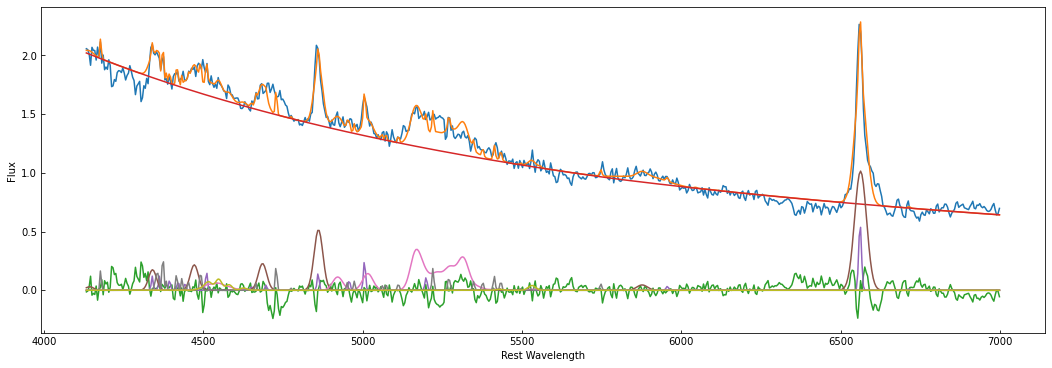

In [55]:
plt.style.context(['nature', 'notebook'])
plt.figure(figsize=(18,6))
plt.plot(s.wave, s.flux)
plt.plot(s.wave, model(s.wave))
plt.plot(s.wave, model(s.wave)-s.flux)

plt.plot(s.wave, cont(s.wave))
plt.plot(s.wave, narrow(s.wave))
plt.plot(s.wave, broad(s.wave))
plt.plot(s.wave, fe(s.wave))
plt.plot(s.wave, fe_fixed(s.wave))
plt.plot(s.wave, fe_nar(s.wave))


plt.xlabel('Rest Wavelength')
plt.ylabel('Flux')
plt.tick_params(which='both', direction="in")
#plt.plot(s.)
plt.savefig('/home/yukawa/slika.pdf')

In [56]:
model

<BinaryOpModel model instance '((((((brokenpowerlaw + ((((((((((((((((((((((((((((((((((((((((((((((((((nr_OIII5007 + nr_OIII4958) + nr_NII6584) + nr_NIII6548) + nr_[O III]_4363) + nr_[O I]_6300) + nr_[O I]_6363) + nr_[S II]_6716) + nr_[S II]_6730) + nr_Cr II 194_4003) + nr_Ni II 12_4015) + nr_Ti II 87_4053) + nr_Cr II 19_4063) + nr_[S II] 1F_4068) + nr_[S II] 1F_4076) + nr_N III_4097) + nr_NIII_4103) + nr_Ti II 105_4163) + nr_Ti II 19_4395) + nr_O II_4414) + nr_Ti II 93_4421) + nr_Ti II 19_4443) + nr_Ti II 19_4450) + nr_NIII1_4510) + nr_Cr II 44_4616) + nr_N III_4640) + nr_N II 5_4643) + nr_C III_4647) + nr_C III_4650) + nr_C III_4651) + nr_Cr II_4697) + nr_Cr II 30_4824) + nr_Cr II 30_4876) + nr_Ti II 114_4911) + nr_Ti II 113_5072) + nr_[N I]_5200) + nr_C III_5695) + nr_Si II_5957) + nr_OIb_6046) + nr_S II_6288) + nr_[S III]_6312) + nr_Si II_6347) + nr_Si II_6371) + nr_Hd_4101) + nr_Hg_4340) + nr_Hb_4861) + nr_Ha_6562) + nr_HeI_4143) + nr_HeI_4471) + nr_HeII_4685) + nr_HeI_5877)) + br) + feii) + fe_forr) + naffFe) + (((0.0 + br_NaI_5890) + br_NaI1_5896) + br_OI_6046))'>

In [16]:
s.gres.parnames

('brokenpowerlaw.refer',
 'brokenpowerlaw.ampl',
 'brokenpowerlaw.index1',
 'brokenpowerlaw.index2',
 'OIII5007.ampl',
 'OIII5007.offs_kms',
 'OIII5007.fwhm',
 'nr_NII6584.ampl',
 'nr_[O III]_4363.ampl',
 'nr_[O I]_6300.ampl',
 'nr_[O I]_6363.ampl',
 'nr_[S II]_6716.ampl',
 'nr_[S II]_6730.ampl',
 'nr_Hd_4101.ampl',
 'nr_Hg_4340.ampl',
 'nr_Hb_4861.ampl',
 'nr_Ha_6562.ampl',
 'nr_HeI_4143.ampl',
 'nr_HeI_4471.ampl',
 'nr_HeII_4685.ampl',
 'nr_HeI_5877.ampl',
 'nr_HeI_6680.ampl',
 'br_Hd_4102.ampl',
 'br_Hd_4102.offs_kms',
 'br_Hd_4102.fwhm',
 'br_Hg_4340.ampl',
 'br_Hg_4340.offs_kms',
 'br_Hg_4340.fwhm',
 'br_Hb_4861.ampl',
 'br_Hb_4861.offs_kms',
 'br_Hb_4861.fwhm',
 'br_Ha_6563.ampl',
 'br_Ha_6563.offs_kms',
 'br_Ha_6563.fwhm',
 'br_HeI_4144.ampl',
 'br_HeI_4144.offs_kms',
 'br_HeI_4144.fwhm',
 'br_HeI_4471.ampl',
 'br_HeI_4471.offs_kms',
 'br_HeI_4471.fwhm',
 'br_HeII_4686.ampl',
 'br_HeII_4686.offs_kms',
 'br_HeII_4686.fwhm',
 'br_HeI_5877.ampl',
 'br_HeI_5877.offs_kms',
 'br_HeI_5

In [18]:
s.save_json()

In [57]:
import plotly.express as px

In [59]:
s1=read_text('/home/yukawa/Documents/tde/SN2016ezh20161222_photcal_V.txt')

In [65]:
import plotly.graph_objects as go

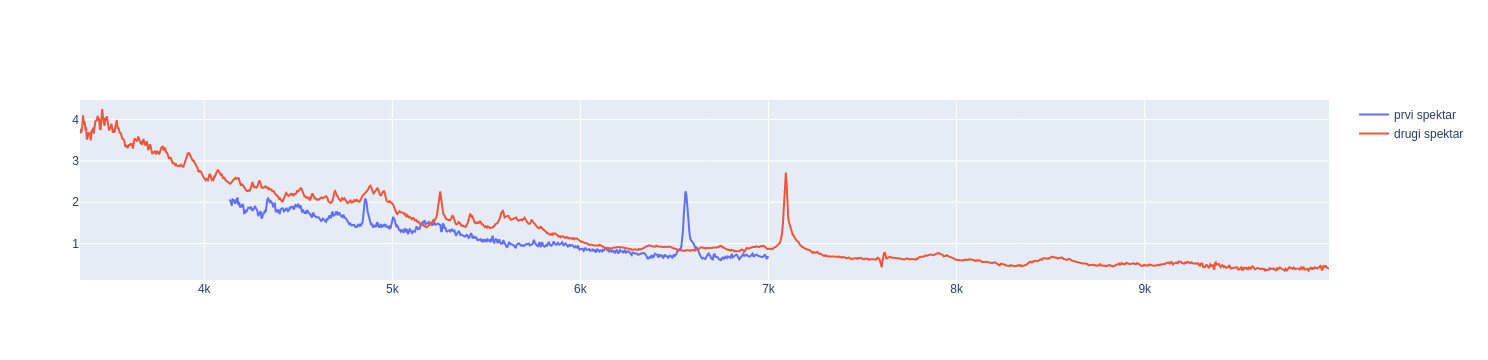

In [76]:
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=s.wave, y=s.flux,mode='lines',name='prvi spektar'))
fig.add_trace(go.Scatter(x=s1.wave, y=s1.flux*10**15, mode='lines', name='drugi spektar'))